In [1]:
import matplotlib.pyplot as plt
from torch import load
import numpy as np

In [2]:
# If you haven't trained a model yet, please go to the file 'baryons_train.ipynb' first!
model = load('../models/test_comb_conv_32.pt')
model.eval()

BaryonModel(
  (linear_in): Linear(in_features=141, out_features=141, bias=False)
  (features_1): Conv1d(1, 1, kernel_size=(141,), stride=(1,), padding=(140,), bias=False)
  (linear_1): Linear(in_features=281, out_features=32, bias=False)
  (linear_2): Linear(in_features=32, out_features=141, bias=False)
  (relu): ReLU()
  (leaky): LeakyReLU(negative_slope=0.01)
  (sigmoid): Sigmoid()
)

In [3]:
from hydroml.libs.dataset import Dataset
from torch.utils.data import DataLoader

net_Baryons_19 = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.2_wBulk_22momdeltaf_netBaryon.dat', dtype=np.float32)

net_Baryons_200 = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu200_tune18.6_wBulk_22momdeltaf_wHBT_netBaryon.dat', dtype=np.float32)

net_Protons_19 = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.2_wBulk_22momdeltaf_netProton.dat', dtype=np.float32)

net_Protons_200 = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu200_tune18.6_wBulk_22momdeltaf_wHBT_netProton.dat', dtype=np.float32)

dataset_19 = Dataset(net_Baryons_19, net_Protons_19, 141)

dataset_200 = Dataset(net_Baryons_19, net_Protons_19, 141)

dataset = dataset_19 + dataset_200

data_loader = DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=True,
)

10000
Event ID 200


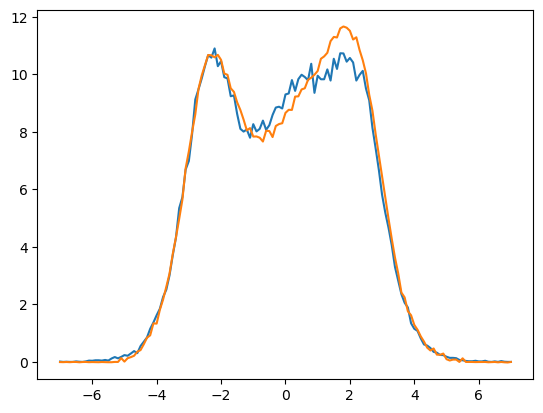

Event ID 300


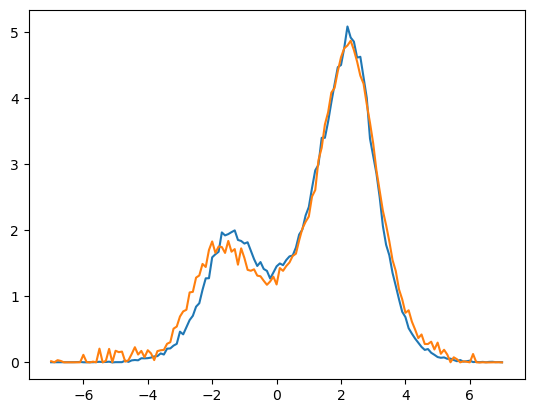

Event ID 400


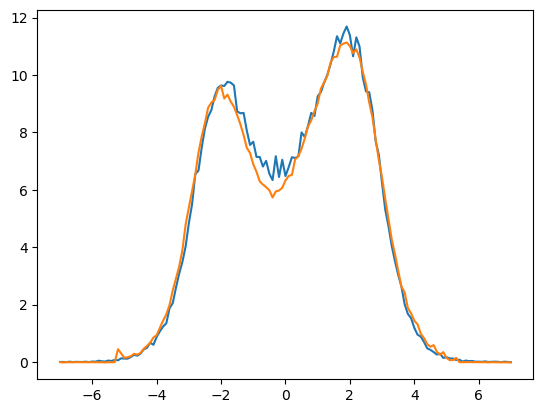

Event ID 700


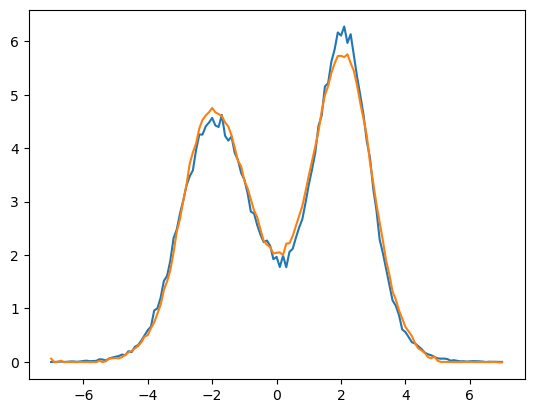

Event ID 800


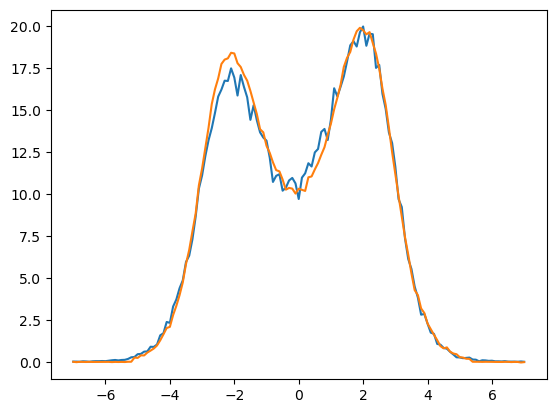

Event ID 900


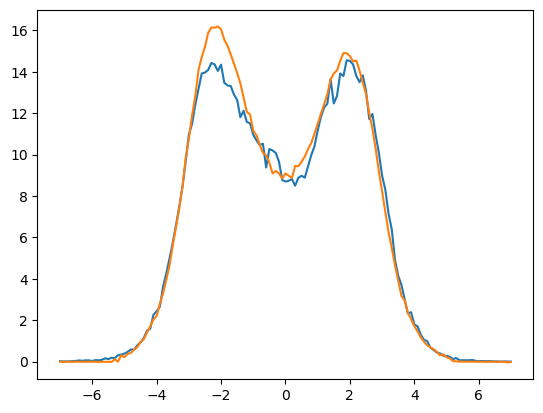

Event ID 1100


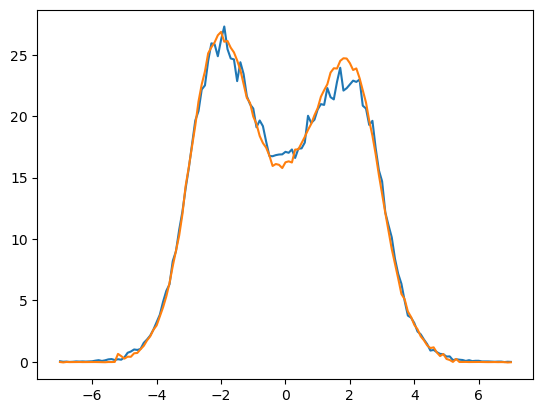

Event ID 1300


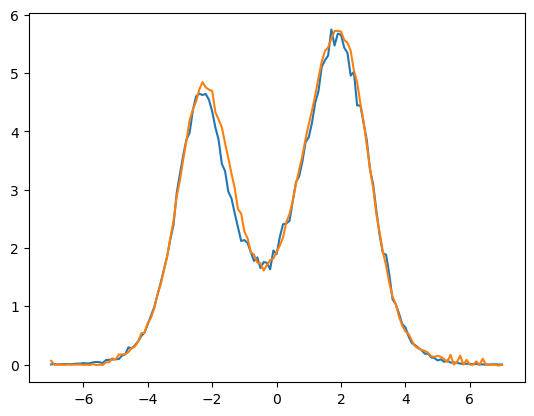

Event ID 1400


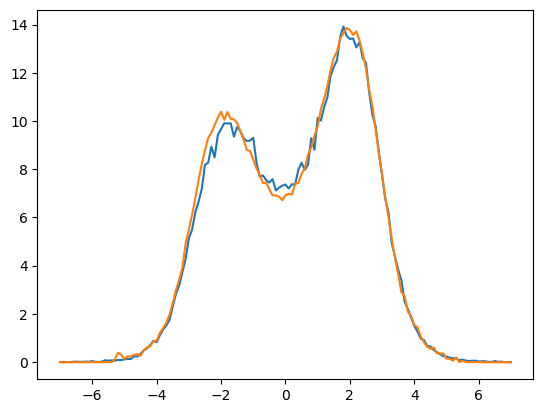

Event ID 1500


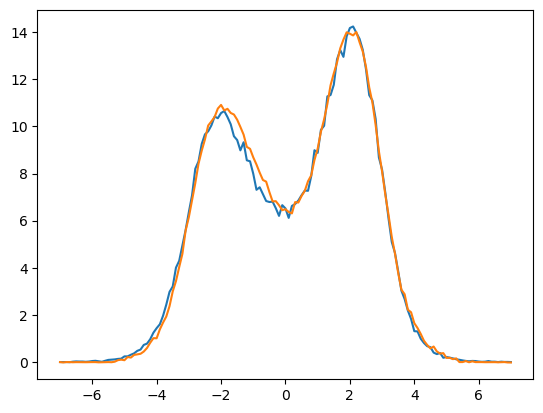

Event ID 1600


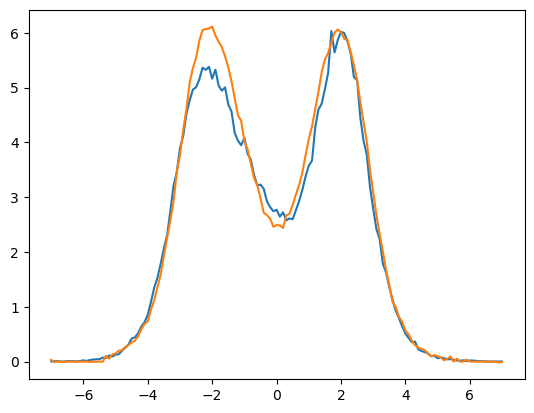

Event ID 2100


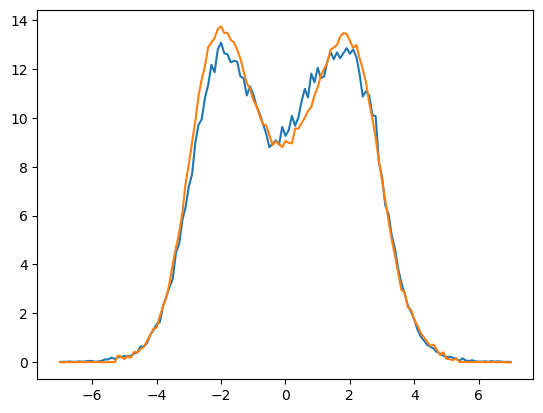

Event ID 2400


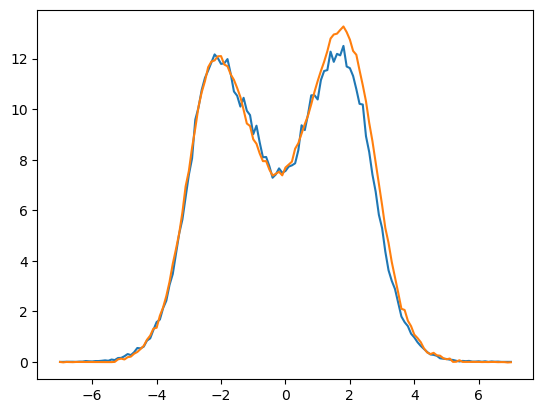

Event ID 2600


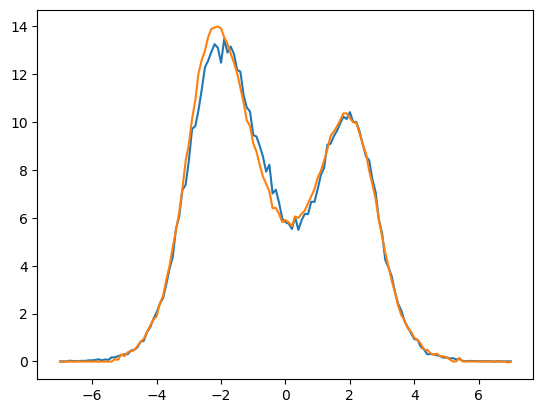

Event ID 2700


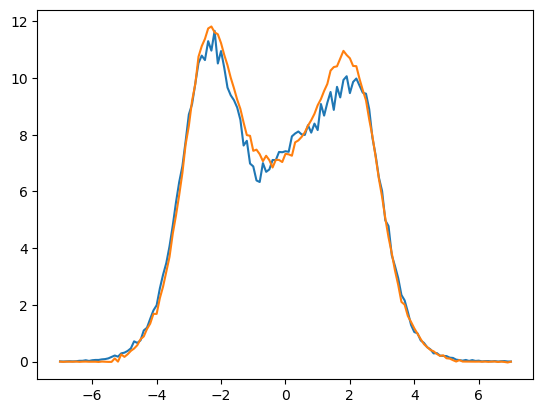

Event ID 2800


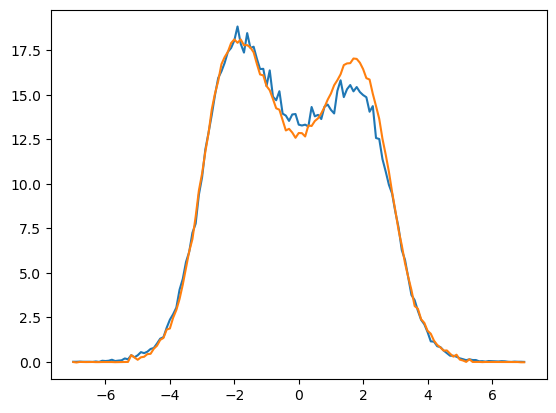

Event ID 2900


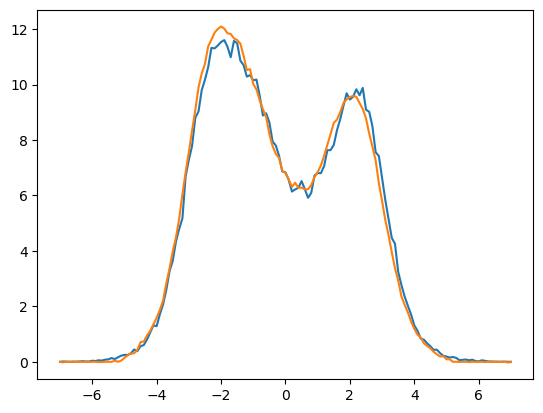

Event ID 3200


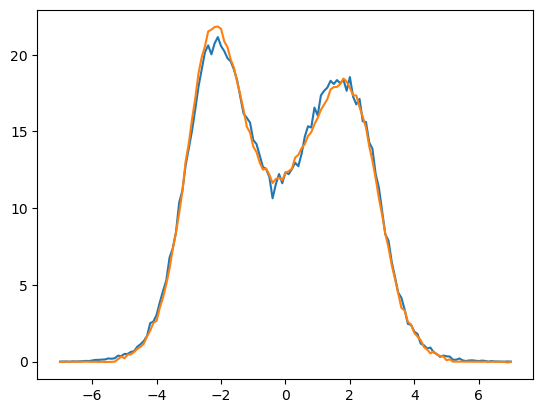

Event ID 3600


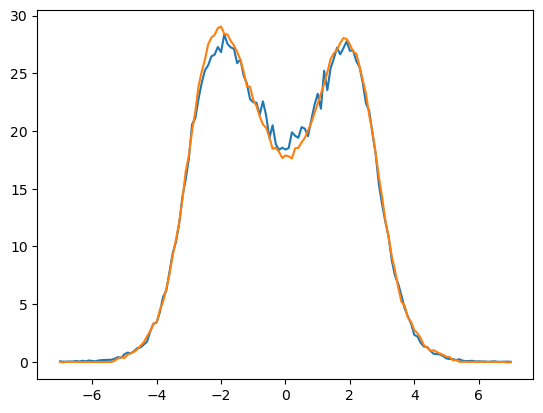

Event ID 3700


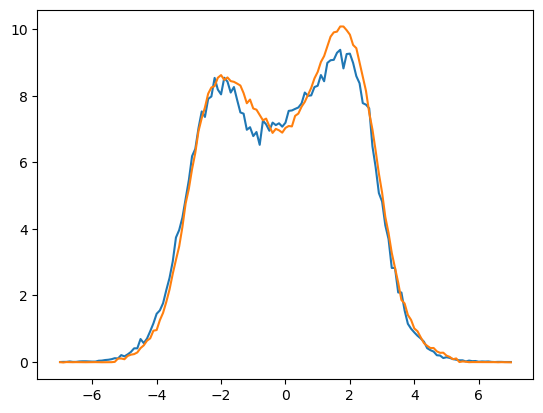

Event ID 3800


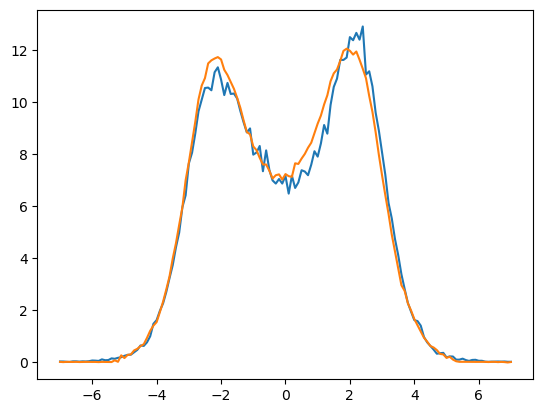

Event ID 3900


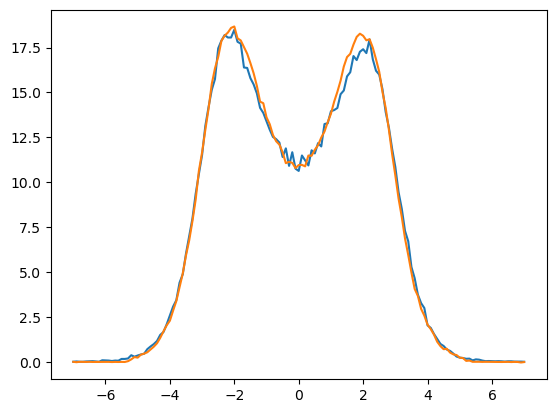

Event ID 4100


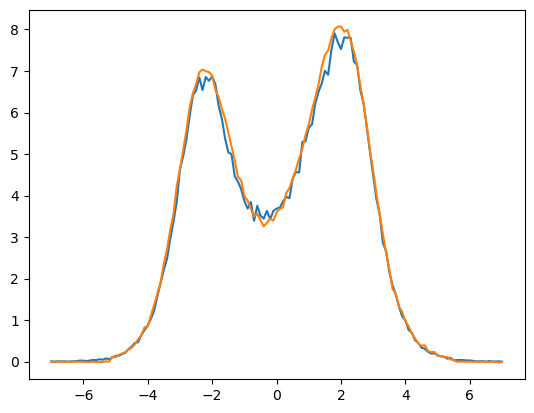

Event ID 4300


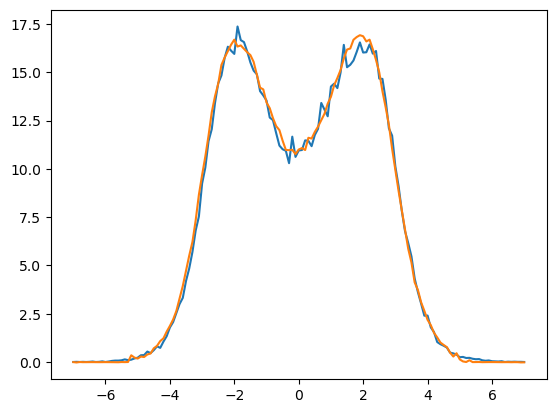

Event ID 4500


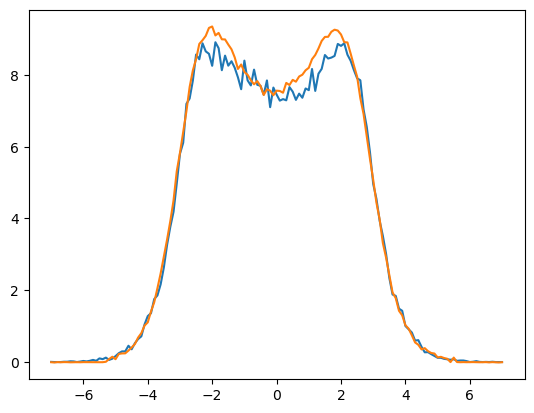

Event ID 4800


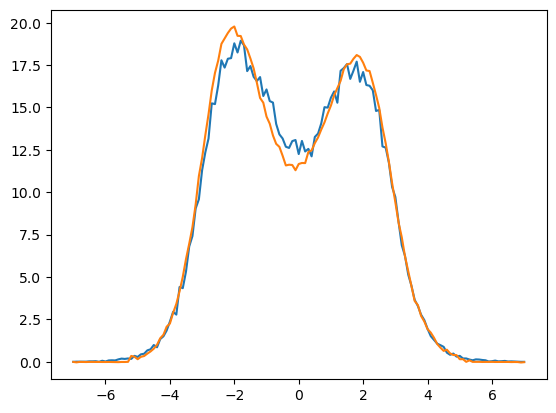

Event ID 5000


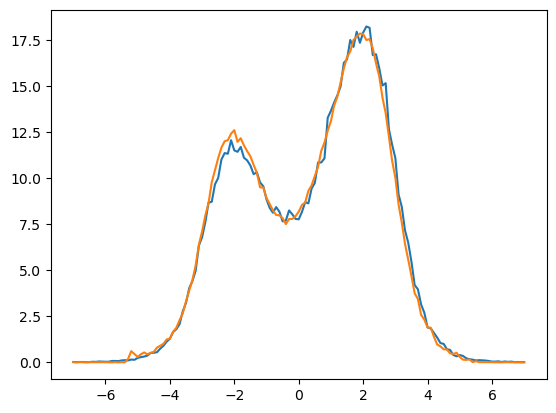

Event ID 5100


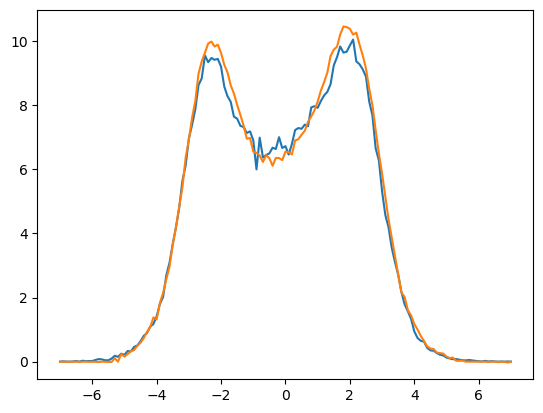

Event ID 5200


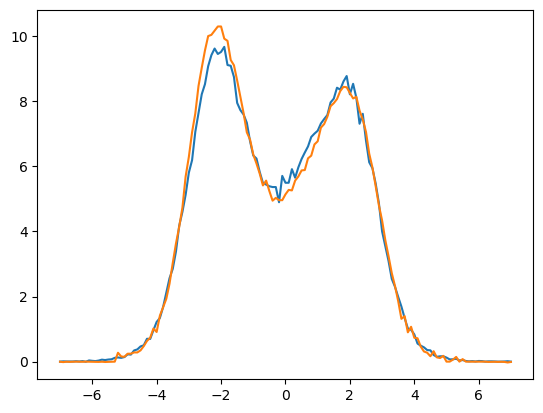

Event ID 5300


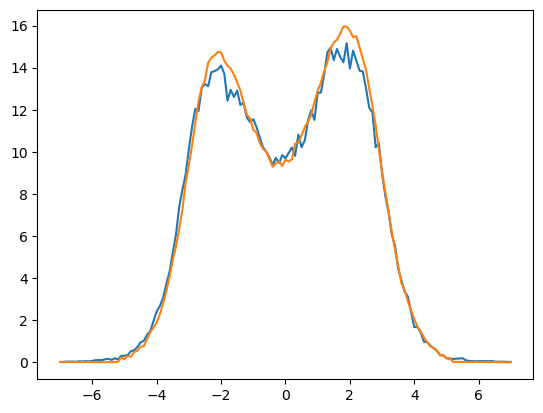

Event ID 5800


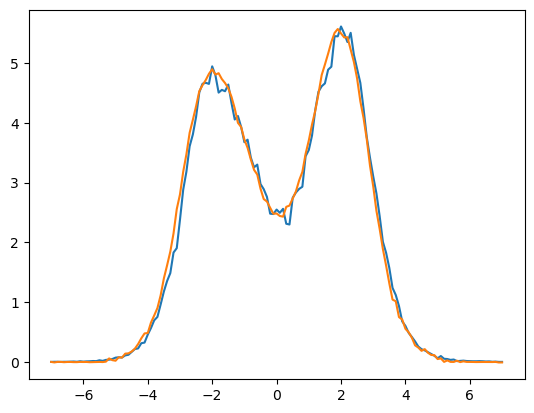

Event ID 6100


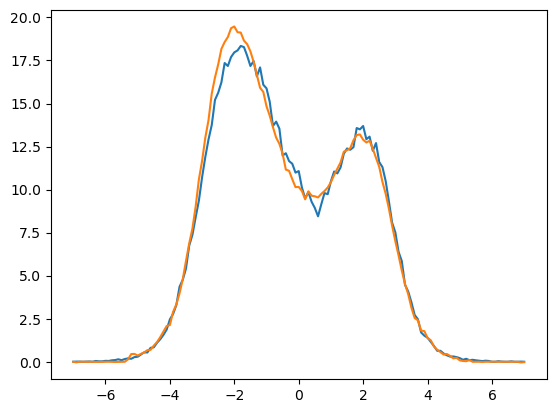

Event ID 6300


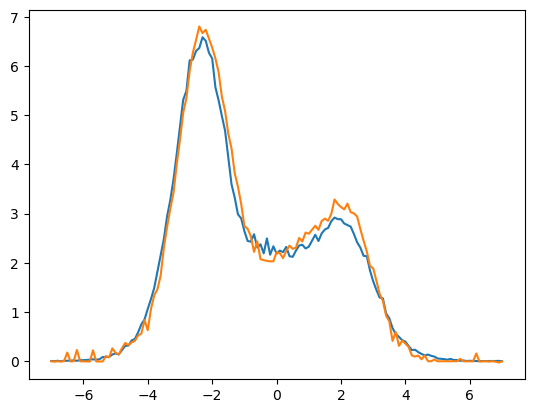

Event ID 6400


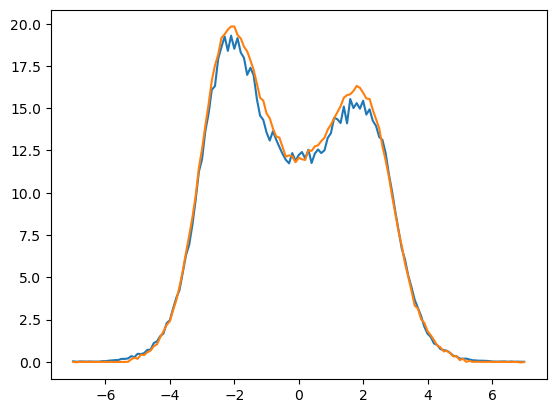

Event ID 6600


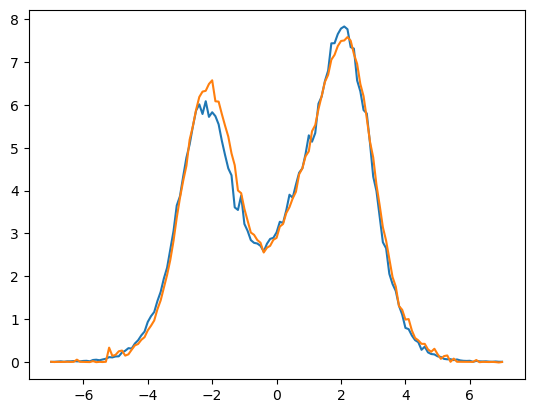

Event ID 6800


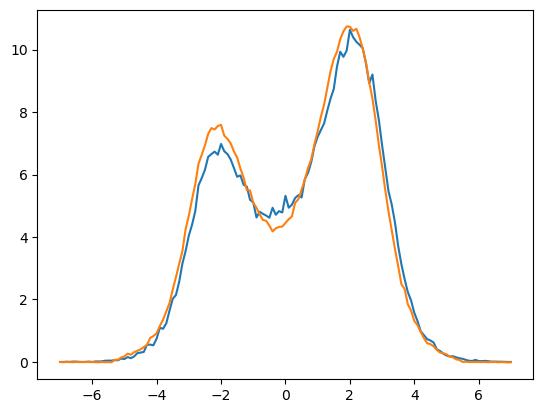

Event ID 6900


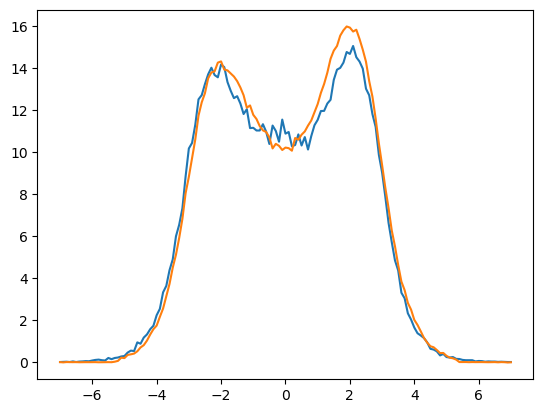

Event ID 7000


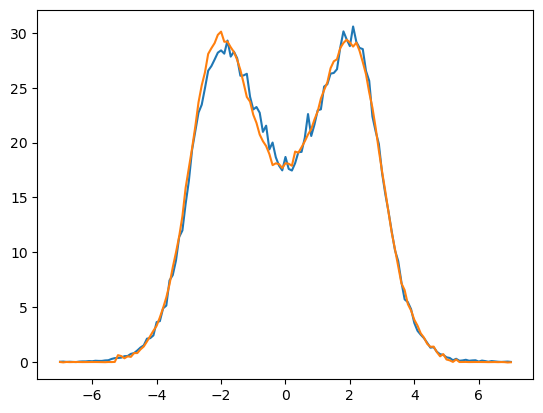

Event ID 7200


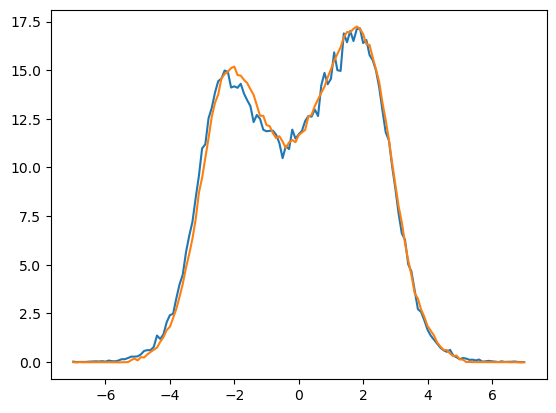

Event ID 7300


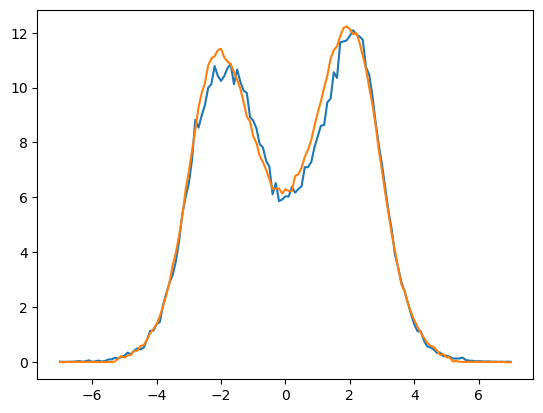

Event ID 7400


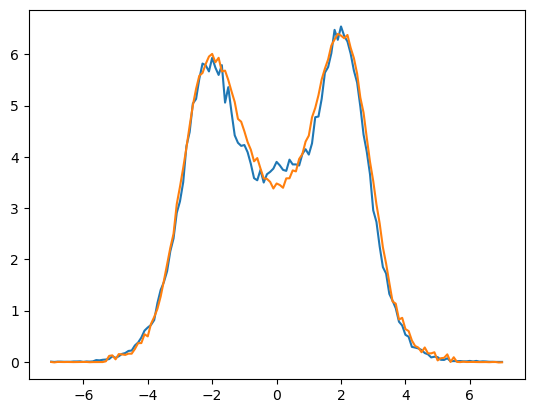

Event ID 7700


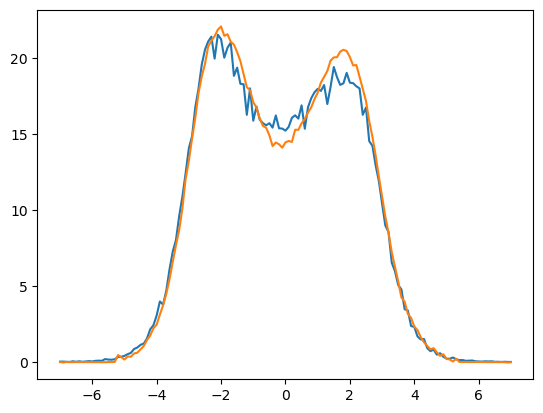

Event ID 7800


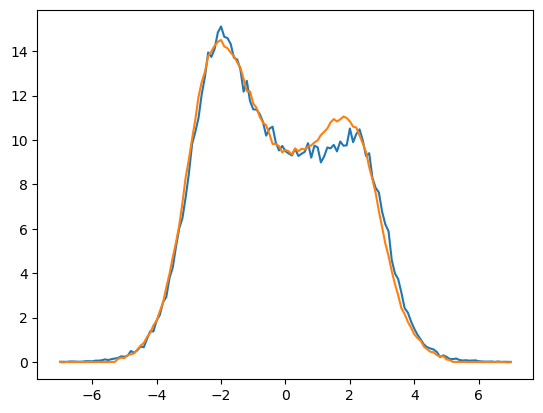

Event ID 7900


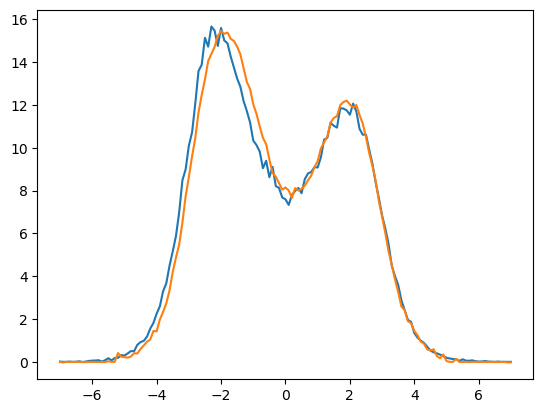

Event ID 8000


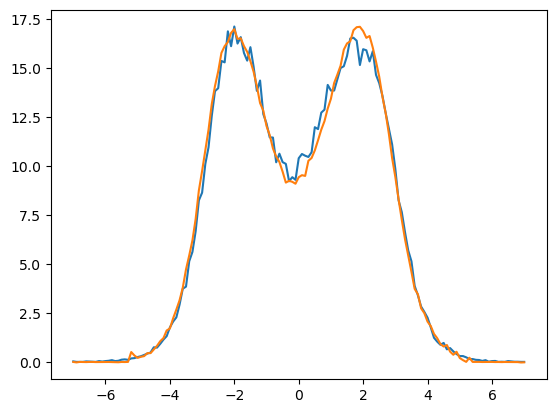

Event ID 8100


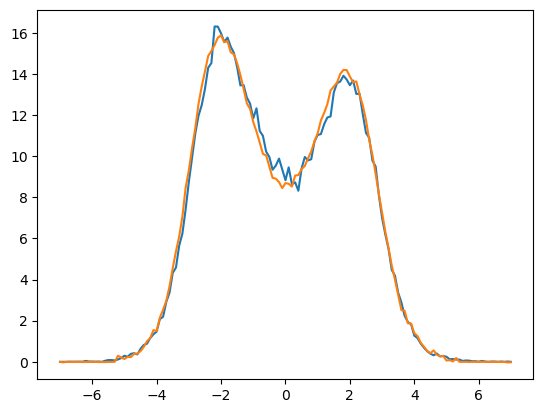

Event ID 8200


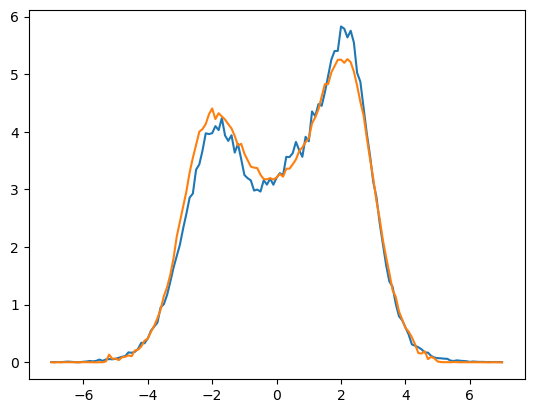

Event ID 8400


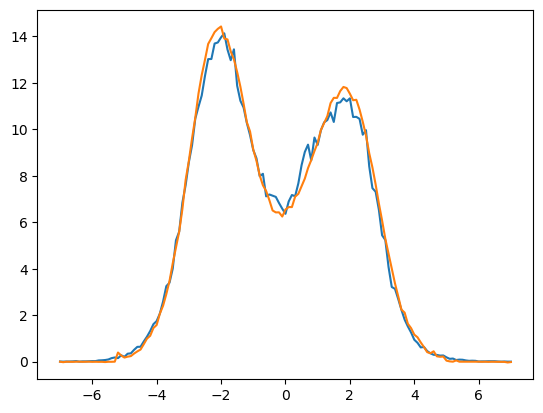

Event ID 8600


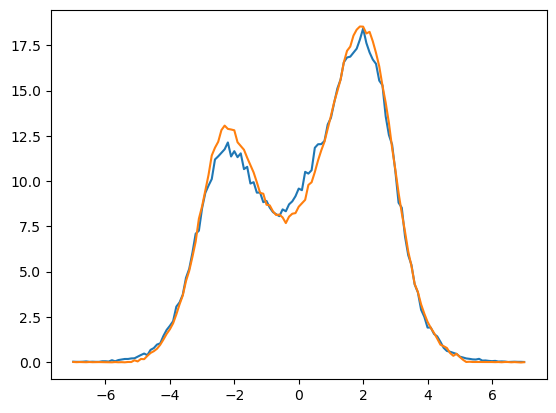

Event ID 9300


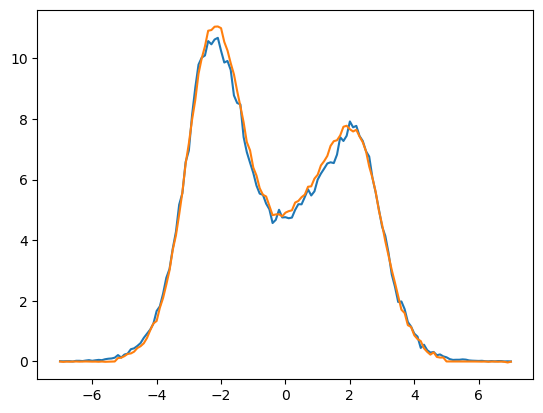

Event ID 9400


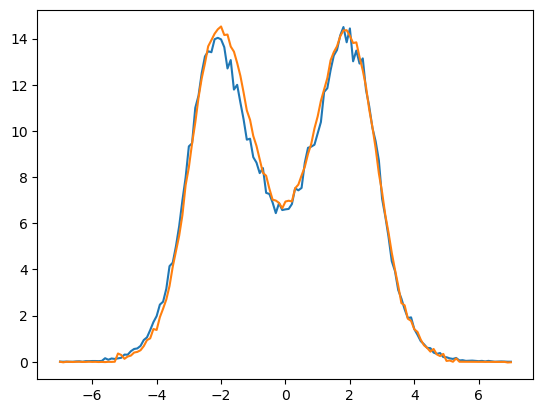

Event ID 9800


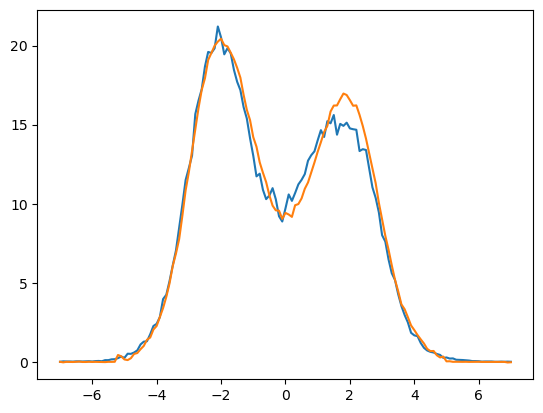

Event ID 9900


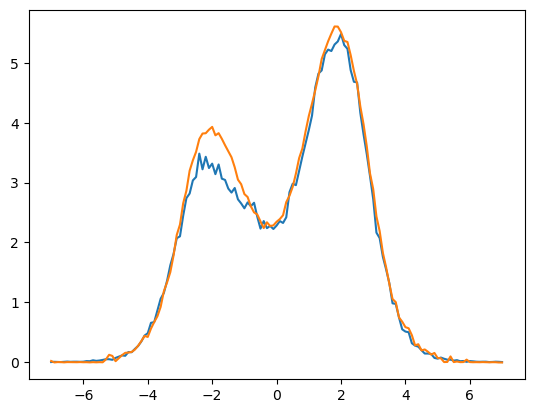

Values for actual final state
Mean: 9.862859725952148
Standard Diviation: 11.34959888458252
Variance: 128.8133960507086 
Variance Error: 2.0040144948425063
Skew: 1.217436983704088
Skew Error: 1.609504292874248
Kurtosis: 3.420358333957893
Kurtosis Error: 13.82308327993022

Values for model output final state
Mean: 9.743743896484375
Standard Diviation: 11.146241188049316
Variance: 124.23870453436575 
Variance Error: 1.9178668905239493
Skew: 1.207421143401314
Skew Error: 1.5455074603617316
Kurtosis: 3.382995449865977
Kurtosis Error: 13.030305455900422


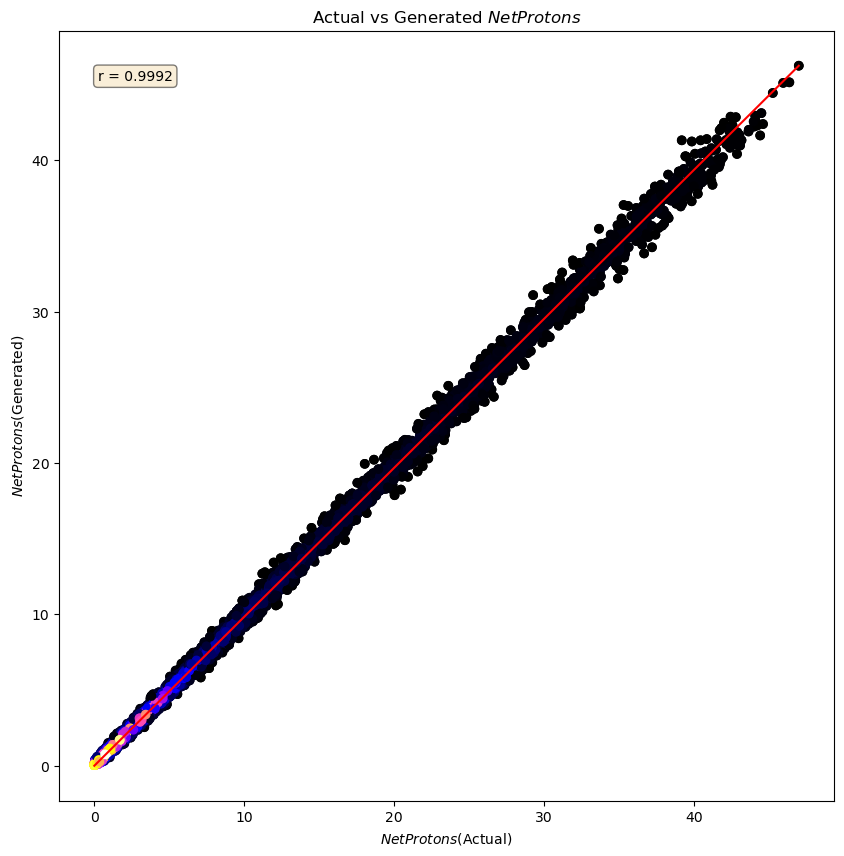

In [4]:
from hydroml.libs.plot import plot_cc_graph, plot_output
from hydroml.libs.moments import Moments
from hydroml.utils.trim import trim

finals = []
models = []
bound_1 = -1
bound_2 = 1

import numpy as np

print(len(data_loader))

for i, data in enumerate(data_loader):
    key = data[0]
    value = data[1].flatten()

    protons_model = model(key)

    protons_model = protons_model.detach().numpy().flatten()

    eta_trim, protons_trim = trim( dataset.eta, value, bound_1, bound_2  )
    _, protons_model_trim = trim( dataset.eta, protons_model, bound_1, bound_2  )

    finals.append( np.trapz( protons_trim, x=eta_trim ) )
    models.append( np.trapz( protons_model_trim, x=eta_trim ) )

    if i%100 == 0 and value.max() > 5.0:
        print(f'Event ID {i}')
        plt.plot(dataset.eta, value)
        plt.plot(dataset.eta, protons_model)
        plt.show()

finals_moments = Moments(finals)
models_moments = Moments(models)

print("Values for actual final state")
print(finals_moments)

print()

print("Values for model output final state")
print(models_moments)

plot_cc_graph(np.array(finals), np.array(models), "Net Protons")